# Understanding Dimensionality Reduction in a Naive Way

## Visualizing the MNIST dataset to understand the impact of PCA and t-SNE Algorithms on Dimensionality Reductions

## About the dataset 

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

Our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. 
### Features of MNIST dataset
* Every training example or data points collected has 28 * 28 pixels.
* There are 42k training examples for our machine learning models.
* For every 42K training examples, there is corresponsing class attributes which can take integer values from 0 to 9.   Obviously these are the digits that we want to recognise with machine learning classification models.

### Problems with Visualization of data 
Since, Each digit has 28 * 28 pixels (pixels are less because we are only dealing on gray scale). But, For machine learning models we need features so that we can train our models on these features. The question is how we are going to do it? <br>
Well, lets start with the fundamentals of Image. An Image is formed by pixels. At High level, we will be dealing with the only two colors black and white and these colors can take values between 0 to 255. Depending upon the arrangement of these values, Different pictures are formed. <br>
so for every digits we have 784 pixels, Depending upon the value taken by these pixels, A picture in this case digits are created. But If we going to take 784 pixels as our features then we will be dealing with 784 dimensions. Sound Scary but we will use the power of linear Algebra based Algorithms like PCA and t-SNE. Let's begin with pre-processing these pixels for our dimensionality reductions algorithms. <br>

In [1]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import the dataset 
mnist_df = pd.read_csv("mnist_train.csv")
mnist_df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visible Features 
* 

In [3]:
mnist_df.shape

(42000, 785)

In [4]:
# Need to seperate the class attribute i.e. from our data frame. 
# save the labels in to the other variables i.e. digits
digits = mnist_df['label']
# drop the labels so that we will have only input parameters i.e. pixels
df = mnist_df.drop('label',axis = 1)

df.head(5)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Checking the current data frames after seperating the class attributes
print(df.shape)
print(digits.shape)

(42000, 784)
(42000,)


To make our lives easier, let's say X as pixels values (can be think of input to Machine learning models) and Y as corresponding class attributes (can be think of output to Machine Learning Models). <br>
So [X] has now 42000 training rows with 784 pixels as a features to Machine Learning 
and [Y] will have 42K rows corresponding to digits values with respect to X. 
Let check out the some of the values using matlab library

Enter the row number  7


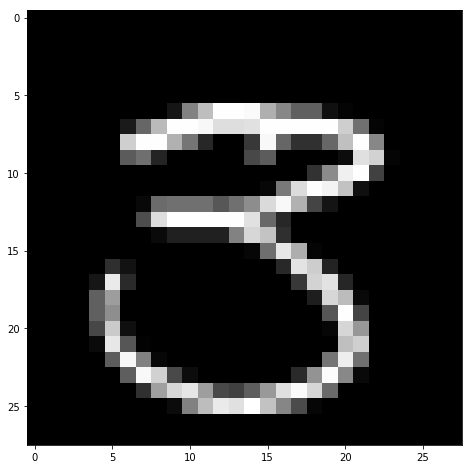

The Value for Row number 7 is 3


In [17]:
import warnings
warnings.filterwarnings("ignore")
# display the digits for a respective rows
plt.figure(figsize=(8,8))
row = int(input("Enter the row number  ")) #row number
#Now we need to reshape the features values into Image matrix
grid_data = df.iloc[row].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation = None, cmap = "gray")
plt.show()

print("The Value for Row number {rowno} is ".format(rowno=row) +str(digits[row]) )

## 2D Visualization about PCA 
PCA i.e. Principal component analysis uses the eigen values and eigen vectors and tries find llinear correlation between features in principal component space. PCA will generate the corresponding eigen vectors for every features and we have to select the top principal component axis let say 2 for 2D visualization if we are targeting visualization with PCA. 

In [19]:
#Let's take 15000 data points to compute faster later we will do it for 42K training data points.
labels = digits.head(15000)
df1 = df.head(15000)

print("The shape of sampled data is ", df1.shape)

The shape of sampled data is  (15000, 784)


In [22]:
#PCA step 1: column standardization of data for compution simplicity 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_data = sc.fit_transform(df1)
# to be sure our dimensions are still same, we verify the again 
print("The shape of standardized data is ",std_data.shape)

The shape of standardized data is  (15000, 784)


In [71]:
#PCA step2: Calculate the Co-variance matrix
sample_df = std_data
cov_x = np.matmul(sample_df.T,sample_df)
print("The shape covariance matrix is ",cov_x.shape)

The shape covariance matrix is  (784, 784)


In [72]:
#PCA step3: Calculate the eigen values and eigen vectors
from scipy.linalg import eigh
e_values,e_vectors = eigh(a=cov_x,eigvals=(782,783)) #indexing 0 to 783
print("The shape of eigen values ", e_values.shape)
print("The shape of eigen vectors ", e_vectors.shape)

The shape of eigen values  (2,)
The shape of eigen vectors  (784, 2)


* Now we need to project the data points on our top 2 eigen vectors also known as PCA1 and PCA2
* Projecting a vector on another vector is dot product of vectors.

In [73]:
# Dot Product e_vectors.T = (2,784) * sample_df.T = (784,15K) can give (2,15K)
# or we can do like this sample_df = (15K,784) * e_vectors = (784,2) can give (15K,2) means 15K points projected
# on Two PCA components. 
coordinates = np.matmul(sample_df,e_vectors)
print("The resutant matrix will have shape of ", coordinates.shape)


The resutant matrix will have shape of  (15000, 2)


In [74]:
#we will create new dataframe by concat labels
new_coordinates = np.c_[coordinates,labels]

In [75]:
df2 = pd.DataFrame(data= new_coordinates, columns=["1st Principal","2nd Principal","Digits"])
df2.head(5)

,1st Principal,2nd Principal,Digits
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


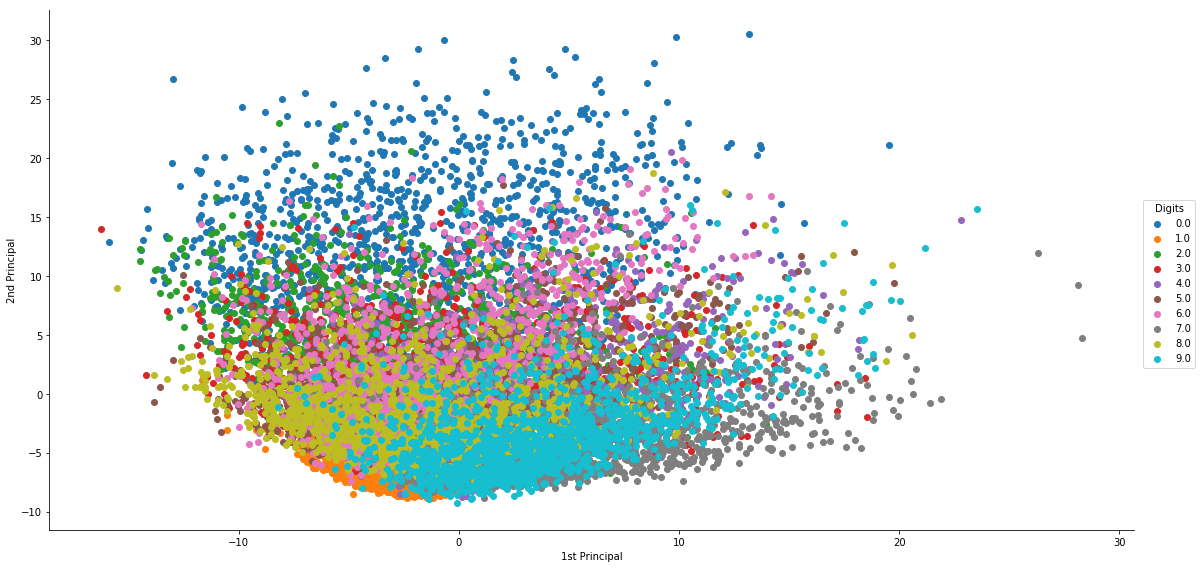

In [76]:
# visualising the 784 Dimensions projected on 2 PCA's 
import matplotlib.pyplot as plt
import seaborn as sns
sns.FacetGrid(data=df2,hue='Digits',size=8,aspect=2) \
    .map(plt.scatter,"1st Principal","2nd Principal").add_legend()
plt.show()

### Interpreting the 2D scatter plot
* 0's are seperated 
* even 1's can seperable
* There can be decision boundary that can seperate 9's with some errors
* Except above all every thing is overlapped, Clearly 2 PC's are not enough for classifications or shall we say PCA is weaker Algorithm than t-SNE, we will find out later. 


## PCA using Scikit Learn 
sklearn has decomposition modules where you can calculate PCA using just few lines of codes.


In [77]:
# Initializing the PCA 
from sklearn import decomposition 
pca = decomposition.PCA()

In [78]:
## Intinilise the PCA varibles
pca.n_components = 2
pca_data = pca.fit_transform(sample_df)

print("The PCA transformed matrix is of shape ",pca_data.shape)

The PCA transformed matrix is of shape  (15000, 2)


In [79]:
#we will create new dataframe by concat labels
new_coordinates1 = np.c_[pca_data,labels]

In [80]:
df_pca = pd.DataFrame(data= new_coordinates1, columns=["1st Principal","2nd Principal","Digits"])
df_pca.head(5)

,1st Principal,2nd Principal,Digits
0,-5.043550,-5.558299,1.0
1,19.305284,6.194216,0.0
2,-7.678743,-1.910029,1.0
3,-0.464876,5.526774,4.0
4,26.644301,6.366617,0.0


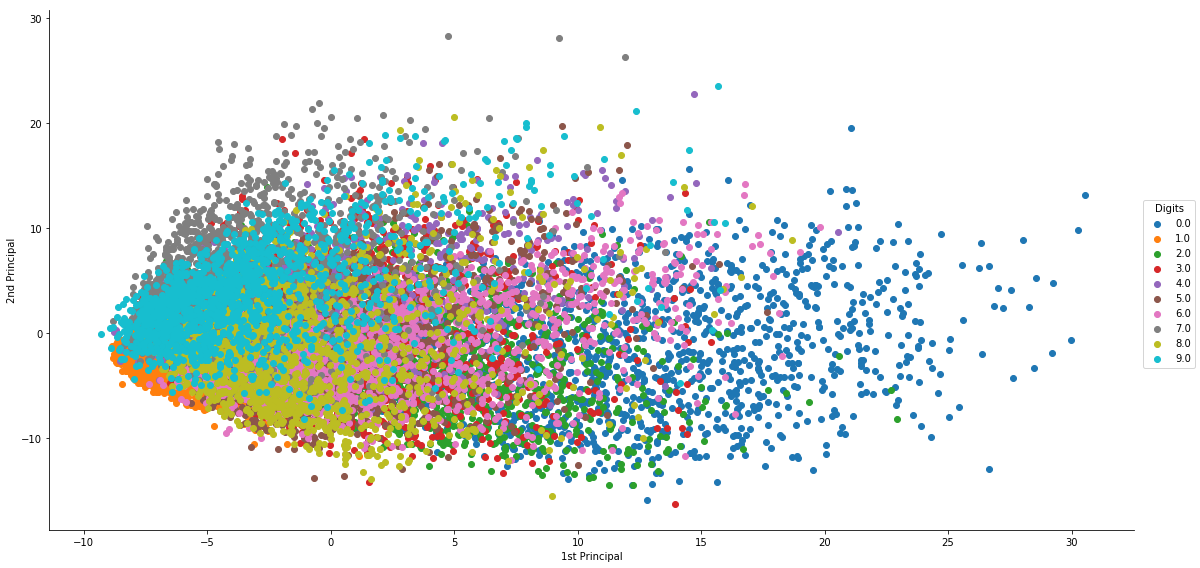

In [81]:
# visualising the 784 Dimensions projected on 2 PCA's 
import matplotlib.pyplot as plt
import seaborn as sns
sns.FacetGrid(data=df_pca,hue='Digits',size=8,aspect=2) \
    .map(plt.scatter,"1st Principal","2nd Principal").add_legend()
plt.show()

Well, sklearn PCA plot looks rotated clockwise by some degree. However, the visualization is same, Because the process is same for calulating PCA. 
### Now let's Understand the other Applications of PCA except visualization
what does it means by % of variance explained or how much information we want's retain after PCA. It's given by 
#### e_values[i] / sum(e_values[i]). 
Suppose the above value is 90%, Then we can say that 90% of variance is explained or 90% of information has been retained. 
##### let's use codes to understand what does it mean ?


### PCA for Dimensionality reduction (not for visualisation)

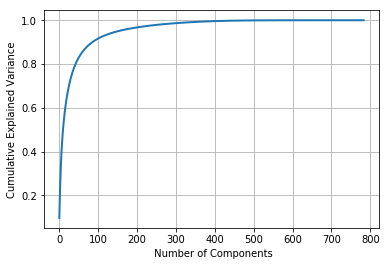

In [50]:
pca.n_components = 784
pca_data1 = pca.fit_transform(sample_df)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

# Now plot the cum_var_explained

plt.figure(1,figsize=(6,4))
plt.clf() # clear the current figure
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.ylabel("Cumulative Explained Variance")
plt.xlabel(" Number of Components")
plt.show()


Clearly, We can see that the cumulative explained variance for principal components values between 300 and 400 has reached >90%. That means If we take our PCA components values to be like say 350, then we will be retaining around >90% of information and we have reduced features variables by >50%.   

## t - SNE Dimensionality Reduction to 2D

In [65]:
#Using scikit learn 
# TSNE
# I will be taking first 1500 example to run faster execution, you are free to experiment with more examples.
from sklearn.manifold import TSNE
t_sne_data = std_data[0:1500,] #standardized pixels values
t_sne_labels = labels[0:1500] #Digits

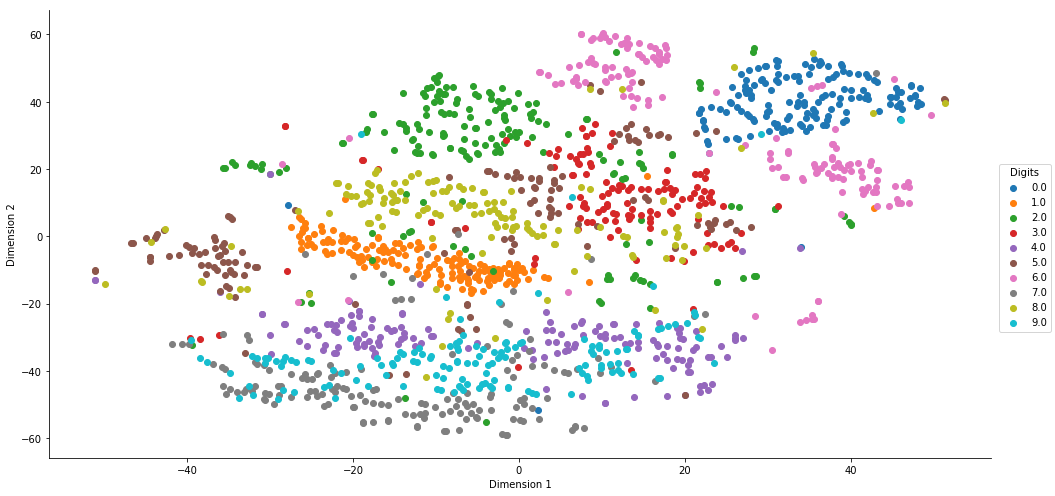

In [66]:
model = TSNE(n_components=2, random_state =0 ) #random state is 0 before tsne is an probablistic Algorithm 

# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

t_sne_fitted_data  = model.fit_transform(t_sne_data)
#concat the fitted data with their corresponding labels
t_sne_fitted_data = np.c_[t_sne_fitted_data,t_sne_labels]
tsne_df = pd.DataFrame(data = t_sne_fitted_data,columns =["Dimension 1","Dimension 2","Digits"])
sns.FacetGrid(data = tsne_df,hue='Digits',size = 7,aspect=2) \
    .map(plt.scatter,"Dimension 1","Dimension 2").add_legend()

plt.show()

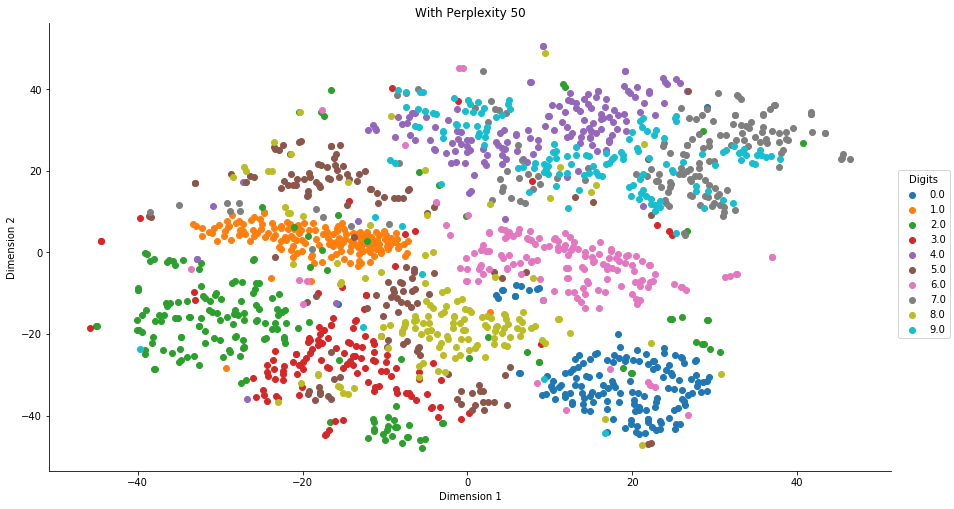

In [67]:
model = TSNE(n_components=2, random_state =0,perplexity=50,n_iter=2000 ) 
#random state is 0 before tsne is an probablistic Algorithm, So each time it will produce different results 

# configuring the parameteres
# the number of components = 2
# perplexity = 50
# default learning rate = 200
# Maximum number of iterations for the optimization = 2000

t_sne_fitted_data  = model.fit_transform(t_sne_data)
#concat the fitted data with their corresponding labels
t_sne_fitted_data = np.c_[t_sne_fitted_data,t_sne_labels]
tsne_df = pd.DataFrame(data = t_sne_fitted_data,columns =["Dimension 1","Dimension 2","Digits"])
sns.FacetGrid(data = tsne_df,hue='Digits',size = 7,aspect=1.8) \
    .map(plt.scatter,"Dimension 1","Dimension 2").add_legend()
plt.title("With Perplexity 50")
plt.show()

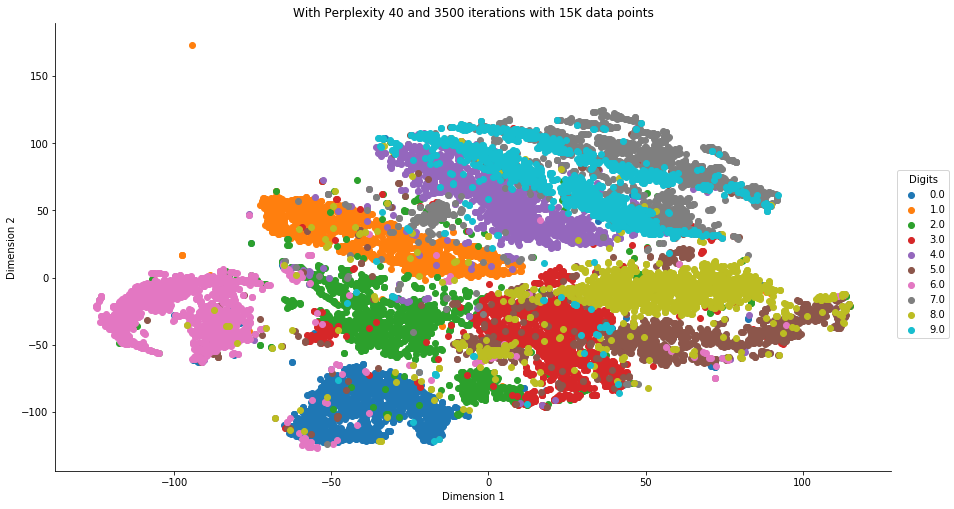

In [70]:
model = TSNE(n_components=2, random_state =0,perplexity=40,n_iter=3500 ) 
#random state is 0 before tsne is an probablistic Algorithm, So each time it will produce different results 

# configuring the parameteres
# the number of components = 2
#  perplexity = 40
# default learning rate = 200
# Maximum number of iterations for the optimization = 3500

t_sne_fitted_data  = model.fit_transform(std_data)
#concat the fitted data with their corresponding labels
t_sne_fitted_data = np.c_[t_sne_fitted_data,labels]
tsne_df = pd.DataFrame(data = t_sne_fitted_data,columns =["Dimension 1","Dimension 2","Digits"])
sns.FacetGrid(data = tsne_df,hue='Digits',size = 7,aspect=1.8) \
    .map(plt.scatter,"Dimension 1","Dimension 2").add_legend()
plt.title("With Perplexity 40 and 3500 iterations with 15K data points")
plt.show()

#### Visual Interpretation
As clearly we can see that, At training t-SNE at 15000 data points only we can see that these data points are nearly seperable now. That means if we train our Algorithm for 42K training point keeping perplexity in [30,50] and iteration of around 5K, We will be getting much nicer visualisation. I can't train as my mac took around 40 mins to get the above output. Do share me your output at kr4.akash@gmail.com for 42k training examples with different perplexities.
This means that in hyper dimension these pixels value or data points is easily seperable. We can use any non linear classification algorithms for this.  